In [2]:
from datetime import datetime
import pandas as pd
import numpy as np

import sys
sys.path.append("..")

import importlib
from cryptoz import utils
importlib.reload(utils)
from cryptoz import plots
importlib.reload(plots)

<module 'cryptoz.plots' from '../cryptoz/plots.py'>

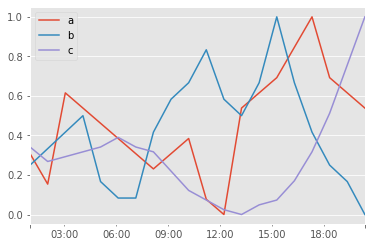

In [10]:
df = pd.DataFrame({
    'a': [5, 3, 9, 8, 7, 6, 5, 4, 5, 6, 2, 1, 8, 9, 10, 12, 14, 10, 9, 8],
    'b': [5, 6, 7, 8, 4, 3, 3, 7, 9, 10, 12, 9, 8, 10, 14, 10, 7, 5, 4, 2],
    'c': [15, 12, 13, 14, 15, 17, 15, 14, 10, 6, 4, 2, 1, 3, 4, 8, 14, 22, 32, 42]
}, index=[
    datetime(2018, 1, 1, 1, 1, 1),
    datetime(2018, 1, 1, 2, 2, 2),
    datetime(2018, 1, 1, 3, 3, 3),
    datetime(2018, 1, 1, 4, 4, 4),
    datetime(2018, 1, 1, 5, 5, 5),
    datetime(2018, 1, 1, 6, 6, 6),
    datetime(2018, 1, 1, 7, 7, 7),
    datetime(2018, 1, 1, 8, 8, 8),
    datetime(2018, 1, 1, 9, 9, 9),
    datetime(2018, 1, 1, 10, 10, 10),
    datetime(2018, 1, 1, 11, 11, 11),
    datetime(2018, 1, 1, 12, 12, 12),
    datetime(2018, 1, 1, 13, 13, 13),
    datetime(2018, 1, 1, 14, 14, 14),
    datetime(2018, 1, 1, 15, 15, 15),
    datetime(2018, 1, 1, 16, 16, 16),
    datetime(2018, 1, 1, 17, 17, 17),
    datetime(2018, 1, 1, 18, 18, 18),
    datetime(2018, 1, 1, 19, 19, 19),
    datetime(2018, 1, 1, 20, 20, 20)
])
df = utils.normalize(df, 'minmax')
df.plot()

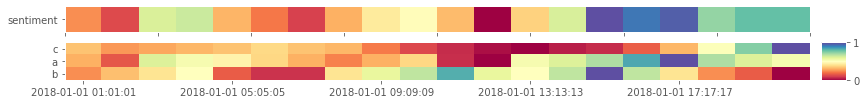

In [11]:
# Rank columns by their last value (desc)
plots.time_heatmap(df, rank_func=lambda x: -x.iloc[-1])

   count      mean       std  min       25%       50%       75%  max
a   20.0  0.465385  0.253871  0.0  0.307692  0.500000  0.615385  1.0
b   20.0  0.429167  0.266660  0.0  0.229167  0.416667  0.604167  1.0
c   20.0  0.296341  0.245473  0.0  0.109756  0.304878  0.341463  1.0


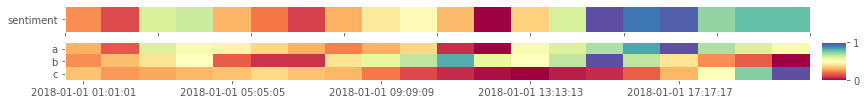

In [5]:
# Rank columns by their mean value (desc)
plots.time_heatmap(df, rank_func=lambda x: -x.mean(), describe=True)

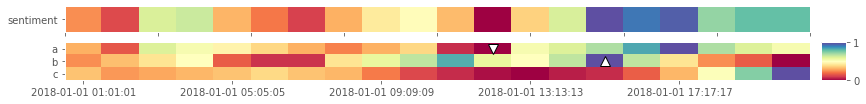

In [6]:
# Show global markers
plots.time_heatmap(df, show_markers='global')

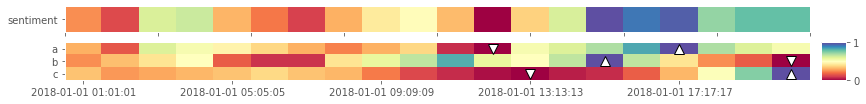

In [7]:
# Show local markers
plots.time_heatmap(df, show_markers='local')

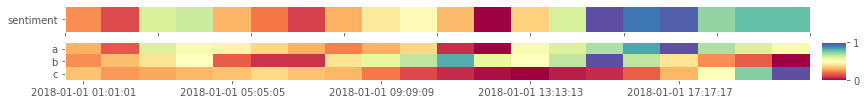

In [8]:
# Set sentiment function
plots.time_heatmap(df, sentiment_func=lambda sr: sr.mean())

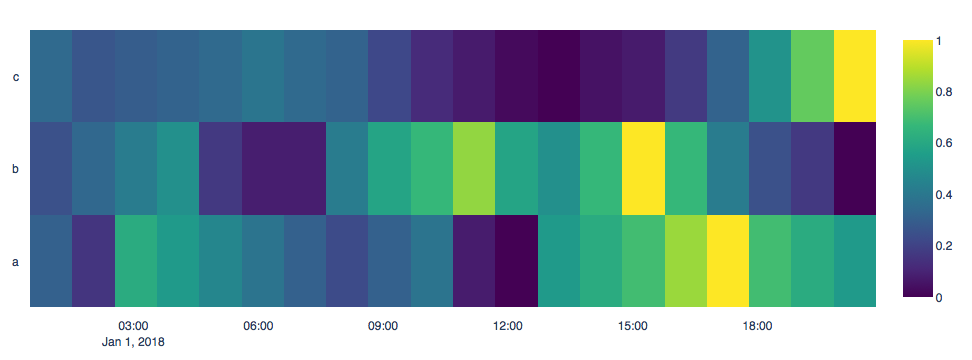

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
        z=df.values.transpose(),
        x=df.index,
        y=df.columns,
        colorscale='Viridis'))
fig.update_layout(
    autosize=False,
    height=300,
    margin=go.layout.Margin(
        l=30,
        r=30,
        b=30,
        t=30,
        pad=10
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()